In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy import signal
import librosa

Found existing installation: ffmpeg 1.4Note: you may need to restart the kernel to use updated packages.

Uninstalling ffmpeg-1.4:
  Successfully uninstalled ffmpeg-1.4


In [1]:
# import pydub
from pydub import AudioSegment
# pydub.AudioSegment.ffmpeg = "C:/ffmpeg"


m4a_file_path = "b.m4a"
audio = AudioSegment.from_file(m4a_file_path, format="m4a")

output_wav_file_path = "b_n.wav"
audio.export(output_wav_file_path, format="wav")

print("Conversion completed!")

Conversion completed!


In [5]:
import wave
import numpy as np
from scipy import signal

def resample_wav(input_file, output_file, new_length):
    # Open the input WAV file
    with wave.open(input_file, 'rb') as wav_in:
        # Get the audio file's properties
        params = wav_in.getparams()
        num_frames = params.nframes

        # Read the audio data as a byte stream
        audio_data = wav_in.readframes(num_frames)

    # Convert the byte stream to a numpy array
    audio_array = np.frombuffer(audio_data, dtype=np.int16)

    # Resample the audio data to the desired length
    resampled_array = signal.resample(audio_array, new_length)

    # Open the output WAV file
    with wave.open(output_file, 'wb') as wav_out:
        # Set the output WAV file's properties
        wav_out.setparams(params)

        # Convert the numpy array back to a byte stream
        output_data = resampled_array.astype(np.int16).tobytes()

        # Write the resampled audio data to the output file
        wav_out.writeframes(output_data)

    print("WAV data resampled successfully!")

# # Example usage
# input_file = 'input.wav'
# output_file = 'output.wav'
# new_length = 10000

# resample_wav(input_file, output_file, new_length)

In [6]:
# Example usage
input_file = 'b_n.wav'
output_file = 'compress_b_n.wav'
new_length = 350000

resample_wav(input_file, output_file, new_length)

WAV data resampled successfully!


In [15]:
#prepare data
Sample_rate, audio_data = wavfile.read('test/Recording.wav')
com_sr, com_ad = wavfile.read('compress.wav')
# b_sr, b_ad = wavfile.read("test/b.wav")
# g_sr, g_ad = wavfile.read("test/g.wav")
# o_sr, o_ad = wavfile.read("test/o.wav")

b_sr, b_ad = wavfile.read("compress_b.wav")
g_sr, g_ad = wavfile.read("compress_g.wav")
o_sr, o_ad = wavfile.read("compress_o.wav")
b_n_sr, b_n_ad = wavfile.read("compress_b_n.wav")

audio_data = audio_data[:,0]
com_ad = com_ad[:,0]
b_ad = b_ad[:,0]
g_ad = g_ad[:,0]
o_ad = o_ad[:,0]
b_n_ad_1 = b_n_ad[:,0]
b_n_ad_2 = b_n_ad[:,1]

audio_data = audio_data.astype('float32') / 32767.0
spectrogram = librosa.feature.melspectrogram(y=audio_data,sr=Sample_rate)

com_ad = com_ad.astype('float32')/32767.0
spectrogram_com = librosa.feature.melspectrogram(y=com_ad,sr=com_sr)

b_ad = b_ad.astype('float32') / 32767.0
spectrogram_b = librosa.feature.melspectrogram(y=b_ad,sr=b_sr)

g_ad = g_ad.astype('float32') / 32767.0
spectrogram_g = librosa.feature.melspectrogram(y=g_ad,sr=g_sr)

o_ad = o_ad.astype('float32') / 32767.0
spectrogram_o = librosa.feature.melspectrogram(y=o_ad,sr=o_sr)

b_n_ad_1 = b_n_ad_1.astype('float32') / 32767.0
spectrogram_b_n_1 = librosa.feature.melspectrogram(y=b_n_ad_1,sr=b_n_sr)
b_n_ad_2 = b_n_ad_2.astype('float32') / 32767.0
spectrogram_b_n_2 = librosa.feature.melspectrogram(y=b_n_ad_2,sr=b_n_sr)

In [16]:
spectrogram.shape, spectrogram_com.shape,spectrogram_b.shape,spectrogram_g.shape,spectrogram_o.shape,spectrogram_b_n_1.shape,spectrogram_b_n_2.shape

((128, 541),
 (128, 342),
 (128, 342),
 (128, 342),
 (128, 342),
 (128, 342),
 (128, 342))

In [21]:
def plot_spectrogram(ad,sr):
    spectrogram = librosa.feature.melspectrogram(y=ad,sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # # Plot the spectrogram
    # # plt.figure(figsize=(10, 6))
    # librosa.display.specshow(spectrogram_db, sr=com_sr, x_axis='time', y_axis='mel')

    plt.imshow(spectrogram_db)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

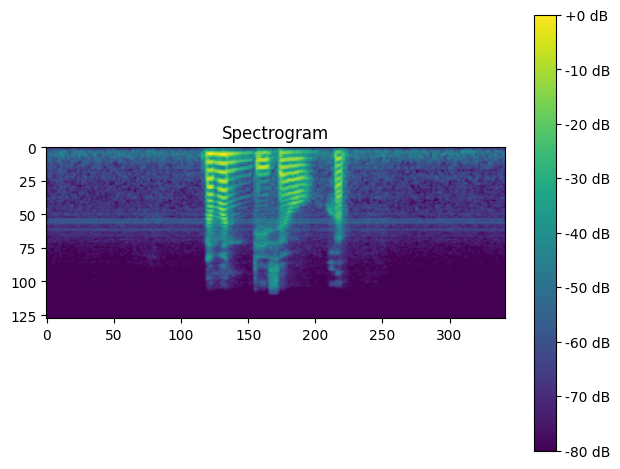

In [22]:
plot_spectrogram(b_n_ad_1,b_n_sr)

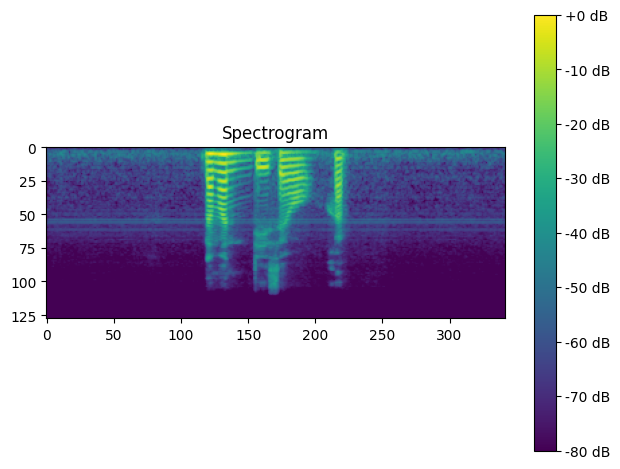

In [18]:
plot_spectrogram(b_n_ad_2,b_n_sr)

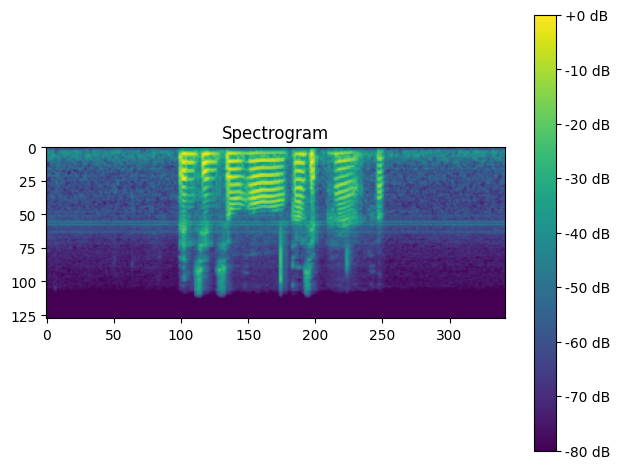

In [14]:
plot_spectrogram(o_ad,o_sr)

In [16]:
spectrogram.shape

(128, 541)

In [18]:
import tensorflow as tf

In [19]:
data = tf.convert_to_tensor(spectrogram_b)
data.shape

TensorShape([128, 342])

In [20]:
data = tf.reshape(data, [1,128, 342, 1])
data.shape

TensorShape([1, 128, 342, 1])

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten
import tensorflow.keras.layers as nn
model = Sequential([
    Conv2D(16, (3,4), activation='relu', input_shape=(128, 342,1)),
    nn.MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (3,3), activation='relu'),
    nn.MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 339, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 169, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 167, 16)       2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 83, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 39840)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [76]:
# model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [22]:
test_result = model(data)

In [23]:
test_result

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.42894465]], dtype=float32)>